# บทที่ 2 - ชุดข้อมูลมหัศจรรย์และถิ่นที่อยู่

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ai-builders/curriculum/blob/main/notebooks/02_fantastic_datasets.ipynb)

ในปัจจุบันชุดข้อมูลที่มีพร้อมทั้งปริมาณและคุณภาพเป็นส่วนสำคัญในการสร้าง ML models ในบทเรียนนี้เราจะเรียนรู้วิธีการหาข้อมูลมาเทรนโมเดลของเราทั้งจากชุดข้อมูล open data, web scraping, หรือสร้างขึ้นมาเองจากโมเดลและโค้ด open source ทั้งนี้การหาข้อมูลมาเทรนโมเดลจากแหล่งข้อมูลสาธารณะที่กล่าวมานั้นเราต้องให้ความสำคัญเรื่องลิขสิทธิ์และจริยธรรม (แม้แต่โมเดลเองก็สร้างข้อมูลที่ผิดลิขสิทธิ์-จริยธรรมได้; เรียนเพิ่มเติมในบทที่ 7)

## ติดตั้ง Package ที่ต้องใช้งาน

In [1]:
#fastai
!pip install -q fastbook

# วิธีลง selenium บน colab จาก [Chalach Monkhontirapat](https://medium.com/equinox-blog/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89-selenium-%E0%B8%9A%E0%B8%99-google-colaboratory-984739ed44e5)
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

#ctgan
!pip install -q sdv

#review generation
!pip install -q transformers

#machine translation
!pip install -q pythainlp[translate] sentencepiece sklearn-pycrfsuite
!pip install -q torch==1.8.0 #downgrade torch สำหรับแปลไทย-จีน

#reset runtime เพื่อให้แน่ใจว่า package ต่างๆใช้งานได้
exit()

     |████████████████████████████████| 720 kB 5.5 MB/s 
     |████████████████████████████████| 188 kB 49.0 MB/s 
     |████████████████████████████████| 1.2 MB 41.8 MB/s 
     |████████████████████████████████| 60 kB 6.3 MB/s 
     |████████████████████████████████| 968 kB 5.3 MB/s 
     |████████████████████████████████| 138 kB 48.2 MB/s 
     |████████████████████████████████| 359 kB 45.2 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 3.6 MB 28.9 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 

## Data-centric AI เมื่อปริมาณ-คุณภาพข้อมูลสำคัญเท่ากับหรือมากกว่าคุณภาพโมเดล

ในปัจจุบันเรามีสถาปัตยกรรมประสิทธิภาพสูงมากมายให้เลือกใช้ทำ ML models (images - ResNet/EfficientNet, texts - BERT family, tabular data - gradient boosted trees) ปริมาณและคุณภาพของชุดข้อมูลจึงเริ่มมีความสำคัญมากยิ่งขึ้นในการทำให้ประสิทธิภาพของโมเดลของเราดีขึ้น

แนวคิด Data-centric AI ถูกทำให้เป็นที่รู้จักโดย [Andrew Ng และ Landing AI](https://landing.ai/data-centric-ai/) กล่าวคือแทนที่เราจะพยามสร้างโมเดลที่มีประสิทธิภาพยิ่งขึ้น (และโดยส่วนใหญ่แล้วซับซ้อน ใหญ่ และใช้งานยากขึ้น)ให้เรามาใช้เวลาในการ 1) เพิ่มปริมาณข้อมูลและ 2) พัฒนาคุณภาพข้อมูลแทน

ยกตัวอย่าง Data-centric AI ในการตัดคำภาษาไทยด้วยโมเดลโดย [@kornwtp](https://medium.com/@kornwtp/) ในบทความ [Data-Centric ML for Thai Word Segmentation](https://medium.com/@kornwtp/data-centric-for-thai-word-segmentation-e31a79db650d) พวกเขาทำการทดลองตัดคำภาษาไทยด้วยชุดข้อมูล [VISTEC-TP-TH-2021](https://github.com/mrpeerat/OSKut/tree/main/VISTEC-TP-TH-2021) (ประมาณ 5 หมื่นประโยค) ด้วยโมเดล [deepcut](https://github.com/rkcosmos/deepcut) อย่างที่เห็นในตารางรายงานผล การเพิ่มขนาดโมเดลถึง 1 เท่าตัวมีผลให้ความแม่นยำเพิ่มขึ้นเพียงแค่ 1.37% กลับกันการเพิ่มข้อมูลเพียงแค่ 1,500 ตัวอย่างทำให้ความแม่นยำเพิ่มขึ้นถึง 4.90% ยิ่งถ้าข้อมูลที่เพิ่มถูกทำความสะอาดแล้วจะทำให้เพิ่มขึ้นถึง 7.48% (แน่นอนว่าถ้ายิ่งโมเดลใหญ่และข้อมูลเยอะก็ยิ่งดี)

<img src=https://miro.medium.com/max/1400/0*J2vA5iRnIMfuDDAc width="500px">

## ชุดข้อมูลสาธารณะ - Open Data and Open Source

ชุดข้อมูล open data และโค้ด open source ถือเป็นสาธารณูปโภคขั้นพื้นฐานของการทำ ML และโชคดีที่น่าจะเป็นสาธารณูปโภคขั้นพื้นฐานไม่กี่อย่างที่เราในฐานะบุคคลสามารถช่วยกันสร้างได้ด้วยการนำไปใช้-เผยแพร่ชุดข้อมูลและโค้ด

โดยทั่วไปแล้ว ชุดข้อมูลจะถูกเผยแพร่ภายใต้ [Creative Commons Licenses](https://creativecommons.org/) ที่นิยมดังต่อไปนี้

* `CC` - Creative Commons
* `BY` (Attribution) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ต้องอ้างอิงเจ้าของผลงาน
* `SA` (ShareAlike) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ต้องคง License เดิมไว้
* `NC` (NonCommercial) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ห้ามใช้เพื่อการค้า
* `ND` (NoDerivatives) - ใช้ทำซ้ำ แจกจ่ายได้ แต่ห้ามดัดแปลง

เราแนะนำให้คุณแบ่งปันผลงานเป็น `CC-BY-SA` เพื่อให้ชุมชนนักพัฒนาสามารถนำไปต่อยอดได้ เหมือนเช่นที่เรานำงานของชุมชนมาต่อยอด

คุณสามารถเลือก License ที่คุณต้องการได้[ที่นี่](https://creativecommons.org/choose/)

### แหล่งค้นหาชุดข้อมูล

ต่อไปนี้คือแหล่งข้อมูลหลักๆที่คุณสามารถพบเจอชุดข้อมูล open data

แหล่งค้นหาชุดข้อมูลทั่วไป
* [Kaggle](https://www.kaggle.com/datasets)
* [Google Dataset Search](https://datasetsearch.research.google.com/)
* [Papers with Code](https://paperswithcode.com/datasets)
* [Tensorflow Datasets](https://www.tensorflow.org/datasets)

แหล่งค้นหาชุดข้อมูล Images
* [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
* [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html)

แหล่งค้นหาชุดข้อมูล NLP และ Speech
* [Hugging Face Datasets](https://huggingface.co/datasets)
* [torchtext.datasets](https://pytorch.org/text/stable/datasets.html)
* [torchaudio.datasets](https://pytorch.org/audio/stable/datasets.html)
* [NLP for Thai](https://nlpforthai.com/)


แหล่งค้นหาชุดข้อมูล Tabular Data
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

### ชื่อ Task ไว้ใช้ค้นหาชุดข้อมูล

อีกแนวทางการค้นหาข้อมูลคือค้นหา "[ชื่อ task] datasets" ใน search engine

Images
* Image classification; จำแนกรูปภาพ
* Object detection; จับวัตถุในรูปภาพ
* Image segmentation; จำแนก pixel ในรูปภาพ
* Image information retrieval (search); ค้นหารูปภาพด้วยรูปภาพ
* Image captioning; ใส่คำบรรยายให้รูปภาพ
* Visual question answering; ตอบคำถามจากรูปภาพ
* Image generation; สร้างรูปภาพ
* Image reconstruction; ซ่อมแซมรูปภาพ (รูปเก่า, เซนเซอร์ ฯลฯ)
* Style transfer; เปลี่ยนสไตล์ของรูปภาพ

NLP
* Sequence classification; จำแนกข้อความ
* Token classification; จำแนกหน่วยคำในข้อความ
* Extractive question answering; ตอบคำถามจากบทความ
* Machine translation; แปลภาษา
* Summarization; ย่อความ
* Paraphrasing; ถอดความ
* Optical character recognition; เปลี่ยนตัวอักษรในภาพเป็นข้อความ
* Text information retrieval (search); ค้นหาข้อความด้วยข้อความ
* Text generation; สร้างข้อความ
* Dialogue; สร้างบทสนทนาตอบโต้

Speech
* Speech classification; จำแนกเสียง
* Automatic speech recognition; ถอดเสียงเป็นข้อความ
* Speech synthesis; สร้างเสียง (จากข้อความ)
* Speaker recognition; จำแนกผู้พูด

Tabular Data
* Multi-class classification; จำแนกตัวอย่าง (1 ตัวอย่าง = 1 ประเภท)
* Multi-label classification; จำแนกตัวอย่าง (1 ตัวอย่าง = มากกว่า 1 ประเภท)
* Regression; ทำนายจำนวนจริง
* Time series forecasting; ทำนายตัวเลขในเชิงเวลา
* Recommendation; แนะนำสิ่งของ

## หารูปภาพจาก DuckDuckGo Image Search API

เทคนิคแนะนำโดย [fastai v4 part1 lesson 2](https://github.com/fastai/fastbook/blob/master/02_production.ipynb) ผู้ที่สนใจสามารถไปติดตามบทเรียนต้นทางได้ที่ [course.fast.ai](https://course.fast.ai/) สามารถใช้ search engine อื่นๆ เช่น Google, Bing เป็นต้น เราเลือกใช้ DuckDuckGo เนื่องจากความสะดวกที่สามารถส่งคำขอค้นหารูปภาพได้โดยไม่ต้องใช้ API key

In [ ]:
from fastbook import *
from fastai.vision.widgets import *
from tqdm.auto import tqdm

#download from duckduckgo
def search_images_ddg(key, max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

In [ ]:
#save ไว้ที่ไหน
path = Path('images')
#เอารูปอะไรบ้าง (labels)
labels = ['chocolate chip cookies','raisin cookies']
#เอา label ละกี่รูป
MAX_N = 100

if not path.exists():
    path.mkdir()
    for l in tqdm(labels):
        dest = (path/l)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(l, max_n=MAX_N)
        download_images(dest, urls=results)

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
#เช็คว่าได้รูปอะไรบ้าง
fns = get_image_files(path)
fns

(#198) [Path('images/raisin/00000075.jpg'),Path('images/raisin/00000091.jpg'),Path('images/raisin/00000070.jpg'),Path('images/raisin/00000048.jpg'),Path('images/raisin/00000054.jpg'),Path('images/raisin/00000037.jpg'),Path('images/raisin/00000026.jpg'),Path('images/raisin/00000041.jpg'),Path('images/raisin/00000025.jpg'),Path('images/raisin/00000012.jpg')...]

In [ ]:
#ดูว่าหารูปไหนไม่เจอบ้าง
failed = verify_images(fns)
failed

(#0) []

In [ ]:
#นำรูปที่หาไม่เจอออก
failed.map(Path.unlink)

(#0) []

## Web Scraping ดึงข้อมูลจากเว็บไซต์สาธารณะ

Web Scraping คือการเขียนโปรแกรมดึงข้อมูลจากเว็บไซต์สาธารณะ ข้อควรระวังคือแม้โดยความเป็นจริงแล้วข้อมูลเหล่านั้นจะถูกเปิดเผยให้ใครเข้าไปดูก็ได้ แต่ไม่ได้หมายความว่าเจ้าของเว็บไซต์จะอยากให้เราดึงข้อมูลจำนวนมากจากเว็บไซต์ของพวกเขา ไม่ว่าจะด้วยเหตุผลด้านลิขสิทธิ์การใช้งานหรือการเพิ่มภาระให้เซิร์ฟเวอร์ของเว็บไซต์นั้นๆ ยกตัวอย่างเช่น Facebook หรือ Twitter ที่ข้อตกลงการใช้งานของพวกเขาไม่อนุญาตให้เราดึงข้อมูลด้วย Web Scraping แต่อนุญาตให้ดึงข้อมูลผ่าน API อย่างเป็นทางการแทน 

หากไม่แน่ใจในนโยบายการใช้งาน ทางที่ดีควรติดต่อขออนุญาตจากเจ้าของเว็บไซต์ก่อน นี่คือตัวอย่างที่ทางทีมงานติดต่อไปยัง [soccersuck.com](https://www.soccersuck.com) เพื่อขออนุญาตนำมาใช้สอน

> ทีมงาน AI Builders: สวัสดีครับ ผมทำโครงการสอนเด็กมัธยมทำ AI ชื่อ AI Builders (https://www.facebook.com/aibuildersx) อยู่ครับ พอดีครั้งนี้เราจะจัดสอนช่วงหลังสงกรานต์ และมีหัวข้อหนึ่งคือ web scraping หรือการเขียนโปรแกรมดึงเนื้อหาจากเว็บไซต์ อยากขออนุญาตใช้ https://www.soccersuck.com/boards/oldnews เป็นตัวอย่างในการฝึกสอนครับ โดนสอนให้น้องๆเขียนโปรแกรมดึงพาดหัวข่าว, url ข่าว, และเนื้อข่าวเฉพาะกระทู้ที่อยู่ใน old news 3 หน้าเท่านั้น โปรแกรมทั้งหมดใช้เพื่อสาธิตในการศึกษาครับ นักเรียนมีจำนวน 50 คน คิดว่าไม่มีปัญหา traffic แม้จะกดรันโค้ดพร้อมกันทุกคนครับ

> Soccersuck: ได้ครับไม่มีปัญหา



### Static Web

สมมุติว่าเราอยากทำโมเดล "เขียนพาดหัวข่าวฟุตบอลจากเนื้อข่าวในเว็บ [soccersuck.com](https://www.soccersuck.com/boards/oldnews)"

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### ดึง HTML มาเปลี่ยนเป็น Soup

In [ ]:
#package สำหรับจัดการ html เรียกว่า BeautifulSoup
def get_soup(url):
    with requests.get(url) as r:
        soup = BeautifulSoup(r.text, features='html.parser')
    return soup

In [ ]:
#ดึงข้อมูล html จากเว็บไซต์มาเปลี่ยนเป็น soup
url = f'https://www.soccersuck.com/boards/oldnews/1/'
soup = get_soup(url)
soup

﻿<!DOCTYPE HTML>

<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <title>
		#### ได้รู้ความจริง ได้ยิ่งกว่าฟุตบอล อ่าน soccersuck.com####	</title>
<link href="/img/web/ss_logo_f_16.ico" rel="shortcut icon"/>
<meta content="app-id=1042191005" name="apple-itunes-app"/>
<meta content="app-id=com.soccersuck.devtab.com.soccersuck" name="google-play-app"/>
<link href="https://www.soccersuck.com/css/jquery.smartbanner.css" media="screen" rel="stylesheet" type="text/css"/>
<meta content="ข่าวฟุตบอล ข่าวบอล นักฟุตบอล ผลการแข่งขัน ข่าวลือ ข่าวการย้ายทีม บอลอังกฤษ บอลเยอรมัน บอลอิตาลี บอลสเปน ฟุตบอล บอบทีมชาติ บอลไทย บอลทีมชติไทย เว็บบอร์ด วาไรตี้ ภาพเซ็กซี่ 18+ โปรแกรมการแข่งขัน โปรแกรมถ่ายทอดสด" name="description">
<meta content="ข่าวฟุตบอล,ข่าวบอล,ผลการแข่งขัน,นักฟุตบอล,บอลอังกฤษ,บอลเยอรมัน,บอลอิตาลี,บอลสเปน,ฟุตบอล,ข่าวการย้ายทีม,

#### หา Tag ต่างๆใน Soup

In [ ]:
#หา tag ชื่อ div ที่มี class oldnew_p_tr
#เราสามารถหาโดย id ได้ด้วย แค่เปลี่ยนเป็น id='id_you_are_looking_for'
soup.find('div', class_='oldnew_p_tr')

<div class="oldnew_p_tr" style="background: #C4E29B;">
<img alt="" src="https://www.soccersuck.com/images/thailand.gif" style="margin: 0px 5px -1px 2px;width: 20px;"/> <a href="https://www.soccersuck.com/boards/topic/2117152" target="_blank">
                    เจาะไม่เข้า! “เขี้ยวกุด” ไร้ชัยในลีก 12 นัดติด เปิดรังเจ๊า “...                    </a>
</div>

In [ ]:
soup.find('div', class_='oldnew_p_tr').find('a')

<a href="https://www.soccersuck.com/boards/topic/2117152" target="_blank">
                    เจาะไม่เข้า! “เขี้ยวกุด” ไร้ชัยในลีก 12 นัดติด เปิดรังเจ๊า “...                    </a>

In [ ]:
#เอา text จาก tag <a>
soup.find('div', class_='oldnew_p_tr').find('a').text.strip(),\
#เอา href จาก tag <a>
soup.find('div', class_='oldnew_p_tr').find('a').get('href')

'https://www.soccersuck.com/boards/topic/2117152'

In [ ]:
df = pd.DataFrame([
{'headline_abridged': i.text.strip(),
 'url': i.find('a').get('href')} \
 #find() จะหาแค่ tag แรกที่เจอ แต่ find_all() จะหาทุก tag ที่ตรงเงื่อนไข
 for i in soup.find_all('div', class_='oldnew_p_tr')]).head(10)
df

,headline_abridged,url
0,เจาะไม่เข้า! “เขี้ยวกุด” ไร้ชัยในลีก 12 นัดติด...,https://www.soccersuck.com/boards/topic/2117152
1,'เลวาน' เบิ้ล!! พี่เสือฟื้นครึ่งหลังซิวเฟือธ 4...,https://www.soccersuck.com/boards/topic/2117150
2,'เอแมร์ซอน' เผยไม่กลับ 'สิงห์' หลังสัญญา...,https://www.soccersuck.com/boards/topic/2117148
3,ผีเตรียมใช้อ็อปชั่นขยายสัญญา 'ดาโลท์' อีกปี,https://www.soccersuck.com/boards/topic/2117143
4,เฟร็ดเบียดเสา! 'ผี' งัดก๊อกสองบดยูงทองสะเด่า 4-2,https://www.soccersuck.com/boards/topic/2117141
5,“เฟลิเป้” ยิงเฮทดเจ็บ! “กว่างโซ้ง” เปิดรังเชือ...,https://www.soccersuck.com/boards/topic/2117136
6,นัดชิงไว้ก่อน! 'คล็อปป์' บอกหงส์โฟกัสเกม 'ยูง...,https://www.soccersuck.com/boards/topic/2117134
7,"""โรมูโล่"" เหมาสอง! ""ขอนแก่น"" บดซิวดราม่า...",https://www.soccersuck.com/boards/topic/2117133
8,"ฝั่งละ 1 ใบแดง! ""ช้างศึกยุทธหัตถี"" เฉือนหวิว &...",https://www.soccersuck.com/boards/topic/2117126
9,'รังนิค' แฮปปี้มี 'เฟลตเชอร์' คอยช่วยทั้...,https://www.soccersuck.com/boards/topic/2117122


#### ดึงข้อมูลจาก url ย่อย

In [ ]:
#จากหน้า list　ข่าว พาดหัวจะแสดงได้ไม่เต็ม
df.loc[0]

headline_abridged    เจาะไม่เข้า! “เขี้ยวกุด” ไร้ชัยในลีก 12 นัดติด...
url                    https://www.soccersuck.com/boards/topic/2117152
Name: 0, dtype: object

In [ ]:
#เราสามารถเข้าไปใน url ของข่าวแต่ละข่าวเพื่อไปเอาพาดหัวแบบเต็มและเนื้อข่าวได้
soup = get_soup(df.loc[0,'url'])
soup.find('div', class_='post_head').text.strip(),\
soup.find('div', class_='post_desc').text.strip()

('เจาะไม่เข้า! “เขี้ยวกุด” ไร้ชัยในลีก 12 นัดติด เปิดรังเจ๊า “ต่อพิฆาต” 0-0',
 'ศึกหนีตายท้ายตาราง “เขี้ยวสมุทร” สมุทรปราการ ซิตี้ เปิดบ้านทำได้แค่เสมอกับ “ต่อพิฆาต” พีที ประจวบ เอฟซี ไร้สกอร์ 0-0 แบ่งกันไปทีมละคะแนน\n\nฟุตบอล รีโว่ ไทยลีก 2021/22  \nวันอาทิตย์ที่ 20 กุมภาพันธ์ 2565 \nสนาม : สมุทรปราการ สเตเดี้ยม\n\nสมุทรปราการ ซิตี้ 0-0 พีที ประจวบ เอฟซี\nผู้ทำประตู : -\n\nครึ่งแรก ทั้งสองทีมเปิดแลกกันสนุก นาทีที่ 29 ประจวบ เกือบขึ้นนำก่อนจาก พีฬาวัช อรรคธรรม เปิดเข้าเขตโทษให้ ซีเกต หมาดปูเต๊ะ โฉบเข้ามายิงแต่โดนไม่เต็ม ทำให้ ปฏิวัติ คำไหม ล้มตัวรับไว้ได้\n\nนาทีที่ 30 สมุทรปราการ เกือบขึ้นนำเช่นกันจาก ชญาวัต ศรีนาวงษ์ แต่ ขวัญชัย สุขล้อม บินปัดทิ้งไปได้ จบครึ่งแรก สกอร์ยังเสมออยู่ 0-0\n\nครึ่งหลัง สมุทรปราการ ทำเกมบุกได้เหนือกว่า แต่ก็เจาะไม่เข้า จบเกม สมุทรปราการ ซิตี้ เปิดบ้านเสมอกับ พีที ประจวบ 0-0 ทำให้ “เขี้ยวสมุทร” ไม่ชนะใครในศึก รีโว่ ไทยลีก เป็นนัดที่ 12 ติดต่อกัน ยังรั้งรองบ๊วย มี 18 คะแนน ส่วน “ต่อพิฆาต” มี 21 คะแนน อยู่อันดับ 14\n\nรายชื่อ 11 ผู้เล่นตัวจริงที่ลงสนาม\n\nสมุท

In [ ]:
#เขียนฟังชั่นเพื่อเข้าไปดึงข้อมูลจากหน้าข่าว
def get_post_head_desc(url):
    soup = get_soup(url)
    return {'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()}

In [ ]:
#วนลูป (map) เพื่อไปดึงพาดหัวแบบเต็มและเนื้อข่าว
df2 = pd.DataFrame(df.url.map(get_post_head_desc).tolist())
df = pd.concat([df,df2],1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


,headline_abridged,url,post_head,post_desc
0,เจาะไม่เข้า! “เขี้ยวกุด” ไร้ชัยในลีก 12 นัดติด...,https://www.soccersuck.com/boards/topic/2117152,เจาะไม่เข้า! “เขี้ยวกุด” ไร้ชัยในลีก 12 นัดติด...,ศึกหนีตายท้ายตาราง “เขี้ยวสมุทร” สมุทรปราการ ซ...
1,'เลวาน' เบิ้ล!! พี่เสือฟื้นครึ่งหลังซิวเฟือธ 4...,https://www.soccersuck.com/boards/topic/2117150,'เลวาน' เบิ้ล!! พี่เสือฟื้นครึ่งหลังซิวเฟือธ 4...,﻿\r\nเป่าปากกันไปสำหรับ บาเยิร์น มิวนิค หลัง ก...
2,'เอแมร์ซอน' เผยไม่กลับ 'สิงห์' หลังสัญญา...,https://www.soccersuck.com/boards/topic/2117148,'เอแมร์ซอน' เผยไม่กลับ 'สิงห์' หลังสัญญาลียงอย...,เอแมร์ซอน พัลเมรี่ เปิดเผยว่าสาเหตุที่ไม่ได้กล...
3,ผีเตรียมใช้อ็อปชั่นขยายสัญญา 'ดาโลท์' อีกปี,https://www.soccersuck.com/boards/topic/2117143,ผีเตรียมใช้อ็อปชั่นขยายสัญญา 'ดาโลท์' อีกปี,แมนเชสเตอร์ ยูไนเต็ด เตรียมใช้อ็อปชั่นในการขยา...
4,เฟร็ดเบียดเสา! 'ผี' งัดก๊อกสองบดยูงทองสะเด่า 4-2,https://www.soccersuck.com/boards/topic/2117141,เฟร็ดเบียดเสา! 'ผี' งัดก๊อกสองบดยูงทองสะเด่า 4-2,﻿\r\n แมนเชสเตอร์ ยูไนเต็ด เกือบเข้าอีหรอบเดิม...
5,“เฟลิเป้” ยิงเฮทดเจ็บ! “กว่างโซ้ง” เปิดรังเชือ...,https://www.soccersuck.com/boards/topic/2117136,“เฟลิเป้” ยิงเฮทดเจ็บ! “กว่างโซ้ง” เปิดรังเชือ...,“กว่างโซ้งมหาภัย” เก็บ 3 แต้มในบ้านสุดระทึก หล...
6,นัดชิงไว้ก่อน! 'คล็อปป์' บอกหงส์โฟกัสเกม 'ยูง...,https://www.soccersuck.com/boards/topic/2117134,นัดชิงไว้ก่อน! 'คล็อปป์' บอกหงส์โฟกัสเกม 'ยูงท...,เยอร์เก้น คล็อปป์ กุนซือ ลิเวอร์พูล บอกนักเตะข...
7,"""โรมูโล่"" เหมาสอง! ""ขอนแก่น"" บดซิวดราม่า...",https://www.soccersuck.com/boards/topic/2117133,"""โรมูโล่"" เหมาสอง! ""ขอนแก่น"" บดซิวดราม่า ""เมือ...","""จงอางผยอง""ขอนแก่น ยูไนเต็ด ได้ทีเด็ดจาก โรมูโ..."
8,"ฝั่งละ 1 ใบแดง! ""ช้างศึกยุทธหัตถี"" เฉือนหวิว &...",https://www.soccersuck.com/boards/topic/2117126,"ฝั่งละ 1 ใบแดง! ""ช้างศึกยุทธหัตถี"" เฉือนหวิว ""...","ชนินทร์ แซ่เอียะ ผู้รักษาประตู ""ฉลามชล"" โดนใบแ..."
9,'รังนิค' แฮปปี้มี 'เฟลตเชอร์' คอยช่วยทั้...,https://www.soccersuck.com/boards/topic/2117122,'รังนิค' แฮปปี้มี 'เฟลตเชอร์' คอยช่วยทั้งตอนซ้...,ราล์ฟ รังนิค กุนซือชั่วคราวของ แมนเชสเตอร์ ยูไ...


### Static Web แบบเร็วด้วย Concurrency

บางครั้งแค่ scape ทีละ url อาจจะไม่ทันใจ เราจึงสามารถ scrape ทีละหลายๆ url "พร้อมๆ" กันได้ด้วย concurrency วิธีมีหลากหลาย แต่เราเลือกใช้วิธีที่แนะนำโดย [Nick Becker, RAPIDS Team at NVIDIA](https://beckernick.github.io/faster-web-scraping-python/)

In [ ]:
import concurrent.futures

In [ ]:
#url ข่าวที่เราต้องการ scrape
urls = df.url.tolist()
urls[:3]

['https://www.soccersuck.com/boards/topic/2117152',
 'https://www.soccersuck.com/boards/topic/2117150',
 'https://www.soccersuck.com/boards/topic/2117148']

In [ ]:
#ฟังชั่นเพื่อเข้าไปดึงข้อมูลจากหน้าข่าวอันเดิม 
#เพิ่มเติมคือเราจะบอกให้มันเก็บข้อมูลที่ถูก scrape ไว้ใน list ชื่อ res
def get_post_head_desc_append(url, res):
    soup = get_soup(url)
    res.append({'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()})

In [ ]:
#เราใช้ 20 threads คือให้ดึงเต็มที่ 20 url　พร้อมๆกัน
MAX_THREADS = 20

def scrape_multithread(urls, scrape_func):
    threads = min(MAX_THREADS, len(urls))    
    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        executor.map(scrape_func, urls)

In [ ]:
#ทำการ scrape แบบ concurrent
from functools import partial

res = []
scrape_multithread(urls, partial(get_post_head_desc_append, res=res))
pd.DataFrame(res)

,post_head,post_desc
0,“เฟลิเป้” ยิงเฮทดเจ็บ! “กว่างโซ้ง” เปิดรังเชือ...,“กว่างโซ้งมหาภัย” เก็บ 3 แต้มในบ้านสุดระทึก หล...
1,เจาะไม่เข้า! “เขี้ยวกุด” ไร้ชัยในลีก 12 นัดติด...,ศึกหนีตายท้ายตาราง “เขี้ยวสมุทร” สมุทรปราการ ซ...
2,'เอแมร์ซอน' เผยไม่กลับ 'สิงห์' หลังสัญญาลียงอย...,เอแมร์ซอน พัลเมรี่ เปิดเผยว่าสาเหตุที่ไม่ได้กล...
3,ผีเตรียมใช้อ็อปชั่นขยายสัญญา 'ดาโลท์' อีกปี,แมนเชสเตอร์ ยูไนเต็ด เตรียมใช้อ็อปชั่นในการขยา...
4,"ฝั่งละ 1 ใบแดง! ""ช้างศึกยุทธหัตถี"" เฉือนหวิว ""...","ชนินทร์ แซ่เอียะ ผู้รักษาประตู ""ฉลามชล"" โดนใบแ..."
5,นัดชิงไว้ก่อน! 'คล็อปป์' บอกหงส์โฟกัสเกม 'ยูงท...,เยอร์เก้น คล็อปป์ กุนซือ ลิเวอร์พูล บอกนักเตะข...
6,'เลวาน' เบิ้ล!! พี่เสือฟื้นครึ่งหลังซิวเฟือธ 4...,﻿\r\nเป่าปากกันไปสำหรับ บาเยิร์น มิวนิค หลัง ก...
7,'รังนิค' แฮปปี้มี 'เฟลตเชอร์' คอยช่วยทั้งตอนซ้...,ราล์ฟ รังนิค กุนซือชั่วคราวของ แมนเชสเตอร์ ยูไ...
8,"""โรมูโล่"" เหมาสอง! ""ขอนแก่น"" บดซิวดราม่า ""เมือ...","""จงอางผยอง""ขอนแก่น ยูไนเต็ด ได้ทีเด็ดจาก โรมูโ..."
9,เฟร็ดเบียดเสา! 'ผี' งัดก๊อกสองบดยูงทองสะเด่า 4-2,﻿\r\n แมนเชสเตอร์ ยูไนเต็ด เกือบเข้าอีหรอบเดิม...


จะเห็นว่าใช้เวลาเพียง 2 วินาที เทียบกับการดึงทีละ url ที่ใช้เวลากว่า 15 วินาที

In [ ]:
%%time
res = []
scrape_multithread(urls, partial(get_post_head_desc_append, res=res))
pd.DataFrame(res)

CPU times: user 747 ms, sys: 29.3 ms, total: 776 ms
Wall time: 2.29 s


In [ ]:
%%time
def get_post_head_desc(url):
    soup = get_soup(url)
    return {'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()}

pd.DataFrame(df.url.map(get_post_head_desc).tolist())

CPU times: user 842 ms, sys: 6.15 ms, total: 848 ms
Wall time: 17.4 s


In [ ]:
%%time
res = []
for url in df.url.tolist():
     res.append(get_post_head_desc(url))
pd.DataFrame(res)

CPU times: user 785 ms, sys: 20.4 ms, total: 805 ms
Wall time: 16.2 s


### Dynamic Web

ในบางกรณี เว็บไซต์จำเป็นต้องให้เราทำกิจกรรมอะไรบางอย่างเพื่อเข้าถึงหน้าที่เราต้องการ scrape เช่น ต้องล็อกอินก่อน, ต้องกดบางปุ่มก่อน เป็นต้น เราเรียกเว็บไซต์ที่มีการเปลี่ยนแปลงจากการทำกิจกรรมอะไรบางอย่างเหล่านี้ว่า Dynamic Web

ในกรณี soccersuck.com สมมุติว่าเราไม่รู้ url ของหน้าต่อไป จำเป็นต้องเขียนโปรแกรมให้กดหน้าต่อไปให้ เราจะใช้ [selenium](https://selenium-python.readthedocs.io) มาช่วยทำกิจกรรมเหล่านี้ (กดหน้าถัดไป)

วิธีลง selenium บน colab จาก [Chalach Monkhontirapat](https://medium.com/equinox-blog/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89-selenium-%E0%B8%9A%E0%B8%99-google-colaboratory-984739ed44e5)

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#### Selenium ก็ Scrape Static Web ได้

In [ ]:
#ติดตั้ง web driver เพื่อจำลองผู้ใช้เว็บไซต์
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [ ]:
#เข้าไปหน้าข่าวเพื่อเก็บ url เหมือนเดิม
url = f'https://www.soccersuck.com/boards/oldnews'
driver.get(url)
soup = BeautifulSoup(driver.page_source)
driver.close()

df = pd.DataFrame([
{'headline_abridged': i.text.strip(),
 'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')]).head(10)
df

,headline_abridged,url
0,ชื่นมื่น! มิลานต่อสัญญา 'เตโอ' ถึงปี 2026,https://www.soccersuck.com/boards/topic/2114004
1,เขามาแล้ว! 'ทูเคิ่ล' ถึงอาบู ดาบีเตรียมพา 'สิ...,https://www.soccersuck.com/boards/topic/2114002
2,ลีดส์มูฟออน 'บิเอลซ่า' พิจารณา 3 ตัวเลือกคุมที...,https://www.soccersuck.com/boards/topic/2113998
3,ไม่ใช่แค่ 'โด้'! 'รังนิค' ชี้ผีต้องผลิตส...,https://www.soccersuck.com/boards/topic/2113997
4,JK ชู 'ดิอาซ' หนึ่งในการเดบิวต์ดีสุดที่เคยเห็น,https://www.soccersuck.com/boards/topic/2113993
5,'เป๊ป' คาดเรือต้องกวาดระดับ 96 แต้มเพื่อแชมป์ลีก,https://www.soccersuck.com/boards/topic/2113983
6,'มอยส์' ยัน 'ซูม่า' พร้อมลงแม้โดนด่าหนัก...,https://www.soccersuck.com/boards/topic/2113974
7,เผยแข้งผีบางส่วนไม่ปลื้มการซ้อม 'รังนิค' มองล้...,https://www.soccersuck.com/boards/topic/2113967
8,"คล็อปป์เผย 'เฮนโด้,มาเน่' พร้อมคืนทัพหงส์บู๊เบ...",https://www.soccersuck.com/boards/topic/2113961
9,สิงห์ยังหวัง 'ทูเคิ่ล' พ้นกักตัวทันมาคุมลูกทีม...,https://www.soccersuck.com/boards/topic/2113952


#### Selenium สำหรับ Dynamic Web

In [ ]:
#ติดตั้ง web driver เพื่อจำลองผู้ใช้เว็บไซต์
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#ฟังชั่นเปลี่ยน soup เป็น dataframe
def get_df(soup):
    return pd.DataFrame([{'headline_abridged': i.text.strip(),
                          'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')])
    
driver = webdriver.Chrome('chromedriver',options=chrome_options)

In [ ]:
dfs = []

#เปิดหน้าเว็บตาม url
url = f'https://www.soccersuck.com/boards/oldnews'
driver.get(url)
print(f'Opened {url}')

#เก็บข้อมูล soup และ dataframe จากหน้า 1
soup = BeautifulSoup(driver.page_source)
d = get_df(soup)
d['page'] = '1'
dfs.append(d)
print(f'Saved soup and dataframe from page 1')

#เราจะกดปุ่มหน้า 2 และ 3
for i in ['2','3']:

    #เช็คดูว่าปุ่มหน้าที่จะกด ('2' และ '3') โหลดแล้วหรือยัง
    try:
        element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.LINK_TEXT, i))
        )
        print(f'Pagination button {i} found!')
    except:
        print(f'Pagination button {i} NOT found')
    
    #คลิกไปหน้าถัดไป
    link = driver.find_element(By.LINK_TEXT, i)
    link.click()
    print(f'Clicked pagination button {i}')

    #เก็บข้อมูล soup และ dataframe จากหน้า i
    soup = BeautifulSoup(driver.page_source)
    d = get_df(soup)
    d['page'] = i
    dfs.append(d)
    print(f'Saved soup and dataframe from page {i}')

#ปิดหน้า web
driver.close()

Opened https://www.soccersuck.com/boards/oldnews
Saved soup and dataframe from page 1
Pagination button 2 found!
Clicked pagination button 2
Saved soup and dataframe from page 2
Pagination button 3 found!
Clicked pagination button 3
Saved soup and dataframe from page 3


In [ ]:
df = pd.concat(dfs).reset_index(drop=True)
df.tail()

,headline_abridged,url,page
362,ผู้ช่วยโค้ชเผย 'เมาท์' เจ็บตอนต่อเวลาต้องรอเช็...,https://www.soccersuck.com/boards/topic/2111881,3
363,"หล่อขั้นเทพ! ชิรูด์เหมาเบิ้ล ""มิลาน"" คัมแบ็คปร...",https://www.soccersuck.com/boards/topic/2111879,3
364,"มุลเลอร์,เลวาน คนละตุง! ""พี่เสือ"" เฉือนไลป์ซิก...",https://www.soccersuck.com/boards/topic/2111877,3
365,"'โบเว่น' ยิงน.120+1 ค้อนเฮต่อเวลา,ขมิ้นเฉือนวู...",https://www.soccersuck.com/boards/topic/2111874,3
366,"แฟรงเฟิร์ตเฉือนสตุ๊ตการ์ท 3-2, สิงห์หนุ่มตามเจ...",https://www.soccersuck.com/boards/topic/2111864,3


## สร้างขึ้นมาเอง

### Annotation, Annotation, Annotation

วิธีที่ตรงไปตรงมาที่สุดคือการเก็บและ label ข้อมูลด้วยมนุษย์ คุณสามารถชวนเพื่อนๆมาทำ หรือแม้แต่จ้างบริษัทมืออาชีพ แน่นอนว่าข้อมูลยิ่งมากยิ่งดี แต่หลายครั้งแค่ 1,000 ตัวอย่างก็พอให้คุณเริ่มทำ ML model ได้แล้ว

ยกตัวอย่างเช่น [@wannaphong](https://github.com/wannaphong) ผู้ก่อตั้ง [PyThaiNLP](https://github.com/PyThaiNLP/pythainlp) ผู้เชี่ยวชาญด้านการสร้างชุดข้อมูลด้วยมือ [@wannaphong](https://github.com/wannaphong) สร้าง

* [thai-named-entity-recognition-data](https://github.com/PyThaiNLP/thai-named-entity-recognition-data/) - ชุดข้อมูล named entity recognition ที่ต่อมารวมกับชุดข้อมูลอีกชุด (ที่ [@wannaphong](https://github.com/wannaphong) ทำการตรวจสอบคุณภาพด้วยมืออีกรอบ) กลายเป็น [ThaiNER](https://github.com/wannaphong/thai-ner) ที่เป็นหนึ่งใน benchmark ที่ใหญ่ที่สุดสำหรับ NER ภาษาไทย

* [spelling-check](https://github.com/PyThaiNLP/spelling-check) - ชุดข้อมูลตรวจสอบการสะกดคำภาษาไทยกว่า 1,800 ประโยค; ใช้สำหรับฟังชั่นแก้คำผิดของ [PyThaiNLP](https://github.com/PyThaiNLP/pythainlp)

* [Thai-Lao-Parallel-Corpus](https://github.com/PyThaiNLP/Thai-Lao-Parallel-Corpus) - แปลภาษาไทย-ลาวประมาณ 260 ประโยค

* [thai-sentence](https://github.com/PyThaiNLP/Thai-sentence) - ประโยคภาษาไทยเขียนเองประมาณ 1,000 ประโยค

* [thai-synonym](https://github.com/PyThaiNLP/thai-synonym/) - คำพ้องความหมายประมาณ 100 คำ

ข้อดีของการทำแบบนี้คือคุณจะเข้าใจชุดข้อมูลของคุณได้ดียิ่งขึ้น และยิ่งถ้าคุณเปิดเผยชุดข้อมูลเป็นสาธารณะก็อาจจะมีคนมาช่วยเพิ่มข้อมูลให้คุณอีกด้วย

### สร้าง Tabular Data เพิ่มด้วย ML Models

เริ่มจากถ้าเรามีข้อมูล tabular อยู่บ้าง แต่ต้องการเพิ่มเพื่อให้โมเดลมีประสิทธิภาพขึ้น เราสามารถสร้างชุดข้อมูลเพิ่มด้วยเทคนิค เช่น [CTGAN](https://arxiv.org/abs/1907.00503) เรียกใช้จาก [sdv](https://sdv.dev/SDV/user_guides/single_table/ctgan.html)

เราทดลองใช้ [CTGAN](https://arxiv.org/abs/1907.00503) สร้างชุดข้อมูลเพิ่มสำหรับโมเดล [xgboost](https://xgboost.readthedocs.io/en/stable/) ในบทที่ 1

จำแนกการตอบสนองของลูกค้ากับแคมเปญที่บริษัทจัดด้วยชุดข้อมูล [Retail Transaction Data](https://www.kaggle.com/regivm/retailtransactiondata) จัดทำโดย []() ดูตัวอย่างการวิเคราะห์เต็มๆได้ที่ [Campaign Response Model - Example.ipynb](https://colab.research.google.com/drive/1eTVlSYcwUYkYDW6sPTY8XVO1QMhr-DNT?usp=sharing)

In [ ]:
#download data
!wget https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Transactions.csv
!wget https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Response.csv

--2022-02-22 13:22:02--  https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Transactions.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ai-builders/curriculum/main/data/Retail_Data_Transactions.csv [following]
--2022-02-22 13:22:02--  https://raw.githubusercontent.com/ai-builders/curriculum/main/data/Retail_Data_Transactions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2633502 (2.5M) [text/plain]
Saving to: ‘Retail_Data_Transactions.csv’

Retail_Data_Transac 100%[===================>]   2.51M  --.-KB/s    in 0.06s   

2022-02-22 13:22:03 (40.9 MB/s) - ‘Retail_Data_Tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

#จัดการข้อมูลให้อยู่ในรูปแบบ (X, y)
df_response = pd.read_csv('Retail_Data_Response.csv')
df_trans = pd.read_csv('Retail_Data_Transactions.csv', parse_dates=['trans_date'])

campaign_date = datetime(2015,3,17)
df_trans['age'] = (campaign_date - df_trans.trans_date).dt.days

df = df_trans.groupby('customer_id').agg(
    recency=('age', 'min'),
    frequency=('customer_id', 'count'),
    monetary=('tran_amount', 'sum'),
    tenure=('age', 'max'),
    length_of_stay=('age', lambda x: x.max() - x.min())
)
df['ticket_size'] = df.monetary / df.frequency
df['std_ticket_size'] = df_trans.groupby('customer_id').tran_amount.std()
df['cv_ticket_size'] = df.std_ticket_size / df.ticket_size

# the number of months visited
active_months = df_trans.groupby(['customer_id', pd.Grouper(key='trans_date',freq='M')]).size().reset_index()
active_months = active_months.groupby('customer_id').trans_date.nunique()
df['active_months'] = active_months
df['avg_spend_m'] = df.monetary / df.active_months
df['avg_visit_m'] = df.frequency / df.active_months
# done with active_months, then drop it
df = df.drop(columns='active_months')
df['avg_tte'] = df.length_of_stay / (df.frequency - 1)

#all data
all_data = df_response.join(df, how='inner', on='customer_id').set_index('customer_id')

#split ข้อมูลเป็น train, validation และ test
random_state = 1024
test_size = 0.2
val_size = 0.2

X = all_data.drop(columns='response')
y = all_data.response

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, 
                                                            stratify=y, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(1-test_size),
                                                  stratify=y_train_val, random_state=random_state)

train_data = X_train.join(y_train)
val_data = X_val.join(y_val)
test_data = X_test.join(y_test)

train_data.shape, val_data.shape, test_data.shape

((4130, 12), (1377, 12), (1377, 12))

เราสร้างชุดข้อมูลเพิ่มจาก `train data` ด้วย CTGAN (ระวังอย่าสร้างจาก validation หรือ test sets ไม่งั้นจะเปิด data leakage ("โกงข้อสอบ")

In [ ]:
from sdv.tabular import CTGAN

#สร้างโมเดล CTGAN เพื่อเรียนรู้จากข้อมูล
model = CTGAN()
model.fit(train_data)

#สร้างชุดข้อมูลใหม่มา 4000 ตัวอย่าง (เดิม training set มี 4,130 ตัวอย่าง)
new_train_data = model.sample(4000)
new_train_data.tail()

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

,recency,frequency,monetary,tenure,length_of_stay,ticket_size,std_ticket_size,cv_ticket_size,avg_spend_m,avg_visit_m,avg_tte,response
3995,84,28,979,1325,1131,76.949329,19.982975,0.316216,92.926638,1.335954,73.633281,1
3996,94,18,559,1367,1274,72.842083,19.179379,0.285931,54.248101,1.107814,68.415274,0
3997,7,21,1882,1300,1294,81.397639,21.016897,0.123104,99.073172,1.283089,54.648109,0
3998,10,22,1343,1289,1217,68.932388,19.109676,0.315229,95.048473,1.236327,51.102417,1
3999,27,17,1407,1341,1158,80.414845,20.593963,0.285133,108.713013,1.216643,58.001528,1


In [ ]:
#ประเมินว่าสร้างข้อมูลปลอมได้ดีแค่ไหน; ค่ายิ่งสูงยิ่งดี
from sdv.evaluation import evaluate

evaluate(train_data, new_train_data)

/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

0.46875659565845895

In [ ]:
#สร้าง X_train_new และ y_train_new ด้วยการเพิ่มข้อมูลปลอมเข้าไป
X_train_new = pd.concat([X_train,new_train_data.drop(columns='response')])
y_train_new = pd.concat([y_train,new_train_data.response])

In [ ]:
#สร้างโมเดลต้นไม้ด้วย xgboost (gradient boosted trees)
import xgboost as xgb

#เทรนด้วยข้อมูลจริง
xgb_params = {'objective': 'binary:logistic', 
              'random_state': 1024,
              'eval_metric': 'auc',
              'early_stopping_rounds': 10,
              'scale_pos_weight' : (len(y_train) - sum(y_train)) / sum(y_train),
              'max_depth': 3, 
              'booster':'gbtree',
              }

model = xgb.XGBClassifier(**xgb_params)
model = model.fit(X_train, 
                  y_train, 
                  eval_set=[(X_val,y_val)],
                  verbose=False)

#เทรนด้วยข้อมูลจริง + ข้อมูลปลอม
xgb_params_new = {'objective': 'binary:logistic', 
              'random_state': 1024,
              'eval_metric': 'auc',
              'early_stopping_rounds': 10,
              'scale_pos_weight' : (len(y_train_new) - sum(y_train_new)) / sum(y_train_new),
              'max_depth': 3, 
              'booster':'gbtree',
              }

model_new = xgb.XGBClassifier(**xgb_params_new)
model_new = model_new.fit(X_train_new, 
                  y_train_new,
                  eval_set=[(X_val,y_val)],
                  verbose=False)

จะเห็นได้ว่าเมื่อเพิ่มข้อมูลปลอมเข้าไปแล้ว micro-averaged F1 และ accuracy ดีขึ้น แต่ AUC แย่ลง เพราะฉะนั้นการที่เราจะเพิ่มข้อมูลปลอมเข้าไปเทรนจำเป็นต้องคำนึงถึงว่าเราต้องการวัดผลของโมเดลด้วย metric ใด

In [ ]:
#รายงานผลโมเดลเทรนบนข้อมูลจริง
print(f'AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')
print(classification_report(y_test,model.predict_proba(X_test)[:,1].round()))

AUC: 0.7718458060027827
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1248
           1       0.19      0.66      0.29       129

    accuracy                           0.70      1377
   macro avg       0.57      0.68      0.55      1377
weighted avg       0.88      0.70      0.76      1377



In [ ]:
#รายงานผลโมเดลเทรนบนข้อมูลจริง+ข้อมูลปลอม
print(f'AUC: {roc_auc_score(y_test, model_new.predict_proba(X_test)[:,1])}')
print(classification_report(y_test,model_new.predict_proba(X_test)[:,1].round()))

AUC: 0.7349992546213477
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1248
           1       0.19      0.53      0.28       129

    accuracy                           0.74      1377
   macro avg       0.56      0.65      0.56      1377
weighted avg       0.87      0.74      0.79      1377



### สร้าง Texts จาก ML Models

สำหรับโมเดล NLP นั้นโชคดีที่ในอินเตอร์เน็ตมีข้อความมากมายให้นักวิจัยสามารถเทรนโมเดลขนาดใหญ่ได้ฟรี เราจึงมีโมเดลที่สามารถสร้างข้อความในแบบที่เราต้องการให้เลือกใช้ได้อย่างหลากหลายใน [HuggingFace Hub](https://huggingface.co/models)

เทคนิคการสร้างข้อความปลอมเพื่อมาเทรนโมเดลนี้เคยถูกใช้สำหรับเทรน[โมเดลแปลภาษาไทย-อังกฤษของ VISTEC](https://airesearch.in.th/releases/machine-translation-models/) ที่สามารถทำผลงานได้ดีที่สุด ณ วันตีพิมพ์ (หาอ่านงานวิจัยได้ที่ [scb-mt-en-th-2020: A Large English-Thai Parallel Corpus](https://arxiv.org/abs/2007.03541)) โดยเราใช้โมเดล [CTRL](https://github.com/salesforce/ctrl) สร้างข้อความรีวิวสินค้าระหว่าง 1-5 ดาวเป็นภาษาอังกฤษออกมาเพื่อให้นักแปลนำไปแปลเพื่อสร้างคู่ประโยคสำหรับเทรนโมเดลอีกที (ดูรายละเอียดได้ที่ [vistec-ai/fake_reviews](https://github.com/vistec-AI/fake_reviews))

แน่นอนว่าทุกวันนี้มีโมเดลที่สามารถสร้างข้อความได้แทบทุกรูปแบบ เราจะยกตัวอย่างโมเดล [GPT](https://arxiv.org/abs/2005.14165) สำหรับการสร้างรีวิวสินค้า 1 ดาวและ 5 ดาว

In [ ]:
from transformers import pipeline
import pprint

#โหลด generator สำหรับรีวิว 1 ดาว
generator1 = pipeline(
    "text-generation",
    model="ehdwns1516/gpt2_review_star1",
)

Exception ignored in: <function Booster.__del__ at 0x7faf6001c830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


Downloading:   0%|          | 0.00/857 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387 [00:00<?, ?B/s]

In [ ]:
context = '<|endoftext|>' #โมเดลต้องการ token พิเศษนี้นำหน้าเพื่อสร้างข้อความ
pprint.pprint([i['generated_text'] for i in generator1(context, 
                                                      max_length = 60, #ให้แต่ละประโยคมีความยาว 60 token
                                                      num_return_sequences=3 #สร้างมา 3 ประโยค
                                                       )])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['<|endoftext|>As someone who has lived a lot in the United States, I know a '
 'great deal about US cities. I would love to have this handy for my kids day '
 'trips, but I had to stick with my little red-headed dog all day after I got '
 'here to bring him a few bags with',
 '<|endoftext|>These were not working until 3 days after I ordered them. The '
 'adhesive came off, so the fabric was not as smooth or even a sturdy piece. I '
 "tried to return them, but it doesn't have an option so I have to buy them "
 'again. The thing in the photo is not as',
 '<|endoftext|>My father was expecting this. It is supposed to be a gift for '
 'your grandpa. I bought two for his third birthday and one for Halloween and '
 'the other was for our two-year-old niece, and they didn’t fit. Don’t buy '
 'it.This is']


In [ ]:
#โหลด generator สำหรับรีวิว 1 ดาว
generator5 = pipeline(
    "text-generation",
    model="ehdwns1516/gpt2_review_star5",
)

Downloading:   0%|          | 0.00/857 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387 [00:00<?, ?B/s]

In [ ]:
context = '<|endoftext|>' #โมเดลต้องการ token พิเศษนี้นำหน้าเพื่อสร้างข้อความ
pprint.pprint([i['generated_text'] for i in generator5(context, 
                                                      max_length = 60, #ให้แต่ละประโยคมีความยาว 60 token
                                                      num_return_sequences=3 #สร้างมา 3 ประโยค
                                                       )])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['<|endoftext|>It was a surprise when I received this! I was so worried about '
 'not having a place for the instructions to open, but the book worked well '
 'and left me feeling safe. The pictures are great, the characters are '
 "intriguing and I love that there's a plot about what happened to each of "
 'them',
 '<|endoftext|>Worked much better on my iPad then my iPhone. Great quality!I '
 'love the fact that it is waterproof so I can change it during the night when '
 'I work at home. It has plenty of room on the bed for storage. It also holds '
 'a big bag of cards and a bunch of',
 "<|endoftext|>This book has so many information, I'm very impressed with the "
 'author and the quality of her writing. I appreciate the fact that this book '
 "was written in English. It's very difficult for me. I really love this "
 'author, not only for her writing, but the way she uses her voice']


### แปลชุดข้อมูลภาษาหลัก

อีกทางหนึ่งสำหรับการหาข้อมูลข้อความ โดยเฉพาะเป็นภาษาไทย คือคุณสามารถหาชุดข้อมูลภาษาหลัก เช่น อังกฤษหรือจีน มาแปลเป็นไทยได้ด้วยโมเดล open source เช่น `pythainlp.translate`

In [ ]:
from pythainlp.translate import Translate
import warnings
warnings.filterwarnings('ignore')

th2en = Translate('th', 'en')
en2th = Translate('en', 'th')

th2zh = Translate('th', 'zh')
zh2th = Translate('zh', 'th')

Corpus: scb_1m_th-en_spm
- Downloading: scb_1m_th-en_spm 1.0


100%|██████████| 703780432/703780432 [00:24<00:00, 28546062.79it/s] 


Corpus: scb_1m_en-th_moses
- Downloading: scb_1m_en-th_moses 1.0


100%|██████████| 1174648148/1174648148 [00:33<00:00, 34739990.97it/s]


Downloading:   0%|          | 0.00/226 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/970k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/970k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/215 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/970k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/970k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

In [ ]:
th2en.translate(['ฉันชอบกินพิซซ่า', 'เธอไม่อยากเล่นฟุตบอล'])

['I like pizza.', "She doesn't want to play football."]

In [ ]:
en2th.translate(['I like pizza.', "She doesn't want to play football."])

"['ฉันชอบพิซซ่า','เธอไม่อยากเล่นฟุตบอล']"

In [ ]:
[th2zh.translate(i) for i in ['ฉันชอบกินพิซซ่า', 'เธอไม่อยากเล่นฟุตบอล']]

['我喜欢吃披萨。', '她不想踢足球。']

In [ ]:
[zh2th.translate(i) for i in ['我喜欢吃披萨。', '她不想踢足球。']]

['ฉันชอบกินพิซซ่าค่ะ', 'เธอไม่อยากเล่นฟุตบอล']

### สร้าง Images จาก ML Models

เช่นเดียวกับข้อมูลข้อความ โมเดลขนาดใหญ่ที่ถูกเทรนด้วยรูปภาพมหาศาลก็สามารถสร้างรูปภาพปลอมเพื่อให้คุณไปเทรนโมเดลได้เช่นกัน เช่น [DALL-E Mini](https://github.com/borisdayma/dalle-mini) ที่เป็นโมเดล open source สร้างเลียนแบบโมเดล [DALL-E](https://openai.com/blog/dall-e/) ของ [OpenAI](https://openai.com/)

วิธีการสร้างรูปภาพค่อนข้างซับซ้อนและกินเวลานาน แนะนำให้ไปลองเล่นกันที่ [demo](https://huggingface.co/spaces/flax-community/dalle-mini) หรือดูรายละเอียดที่ [github repository](https://github.com/borisdayma/dalle-mini)

<img src=https://github.com/ai-builders/curriculum/raw/main/images/dalle_e_toast.png width="700px">


อีกตัวอย่างใกล้ตัวคือการใช้ Generative Adversarial Networks (GAN) เรียนรู้จากรูปที่เรามีอยู่เพื่อสร้างตัวอย่างเพิ่มขึ้น เช่น การสร้าง Anime faces จากรูปที่มีอยู่โดย [@konkuad](https://github.com/konkuad) ใน [konkuad/GANime](https://github.com/konkuad/GANime)

In [2]:
!rm -r GANime
!git clone https://github.com/konkuad/GANime
!cd GANime; pip install .

Cloning into 'GANime'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 108
Receiving objects: 100% (111/111), 106.21 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Processing /content/GANime
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for GANime: filename=GANime-0.1-py3-none-any.whl size=5135 sha256=6be34562ecbc159776cc58d89c29d2adb24e748cc3aa5f01d503a8b5efe003d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-b_4xky_v/wheels/fd/0f/10/5ae3a127018ab28a4dc2e8f1196ec

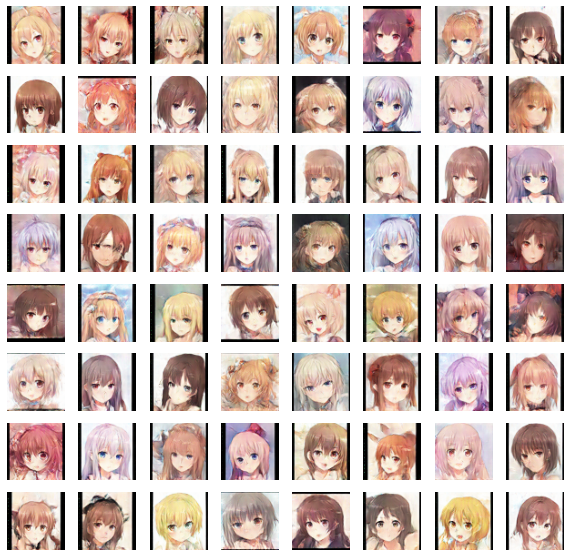

In [5]:
import torch
from GANime.gan import GAN

#initialize new model with random weights
seed_size=128
new_gan_model = GAN(seed_size)
#load model trained for 100 epochs
new_gan_model.gen.load_state_dict(torch.load('GANime/example_models/gen.pt'))
new_gan_model.dis.load_state_dict(torch.load('GANime/example_models/dis.pt'))
#infer generation
generated_images = new_gan_model.generate(num_rows=8,
               num_cols=8,
               plot=True,
               device='cpu',
               return_noise=False
              )

# Checkpoint ท้ายบท

## คำถามชวนคิดเกี่ยวกับบทเรียน

1. คุณคิดว่าปัญหาที่คุณกำลังจะแก้ด้วย ML นั้นปริมาณและคุณภาพของข้อมูลที่ใช้เทรน (Data-Centric AI) หรือประสิทธิภาพของโมเดล (Model-Centric AI) สำคัญกว่ากัน เพราะอะไร

2. คุณคิดว่า open data และ open source มีข้อดี-ข้อเสียอย่างไรต่อ 1) ผู้สร้างผลงาน 2) ผู้นำผลงานไปใช้ 3) ชุมชน 4) สังคมโดยรวม

3. คุณคิดว่าการใช้ข้อมูลสาธารณะจากเว็บไซต์ต่างๆมาเทรนโมเดลมีข้อควรระวังอะไรบ้าง

4. การเทรนโมเดลด้วยข้อมูลที่สร้างขึ้นมาจากอีกโมเดลหนึ่ง ("ข้อมูลปลอม") นั้นมีข้อดี-ข้อเสียอย่างไรบ้าง

## สิ่งที่ควรเตรียมพร้อมสำหรับทำโครงงาน

### ☑️ ทบทวนระบบการให้คะแนนโครงงานให้เรียบร้อย

AI Builders จะออกใบประกาศนียบัตรจบการศึกษาให้กับผู้เข้าร่วมโครงการที่ส่งโครงงานได้คะแนนอย่างน้อย 70 จาก 100 คะแนนตามเกณฑ์ต่อไปนี้เท่านั้น

1. problem statement; เหตุผลในการแก้ปัญหาเชิงธุรกิจ/ชีวิตประจำวันด้วย machine learning - 15 คะแนน
2. metrics and baselines; การให้เหตุผลเชื่อมโยงการแก้ปัญหากับตัวชี้วัดที่เลือก / การวัดผลเทียบกับวิธีแก้ปัญหาในปัจจุบัน - 15 คะแนน

**วันนี้เราจะคิดถึง 2 ข้อนี้เป็นพิเศษ**

**3. data collection and cleaning; การเก็บและทำความสะอาดข้อมูล - 15 คะแนน**


**4. exploratory data analysis; การทำความเข้าใจข้อมูล - 20 คะแนน**


5. modeling, validation and error analysis; การทำโมเดล, ทดสอบโมเดล และวิเคราะห์ข้อผิดพลาดของโมเดล - 20 คะแนน
6. deployment; การนำโมเดลไปใช้แก้ปัญหาจริง - 15 คะแนน

### ☑️ หาข้อมูลมาจากไหนดี

จากแหล่งข้อมูลทั้งหมดที่กล่าวมาในบทเรียนนี้ คุณคิดว่าจะหาชุดข้อมูลจากไหนมาเทรนโมเดล

### ☑️ คุณภาพของข้อมูล Labels และ Inputs

ข้อมูลที่คุณได้มาจากอินเตอร์เน็ตไม่ว่าจะดาวน์โหลดชุดข้อมูลของคนอื่น, scrape เว็บไซต์, ใช้โมเดลคนอื่นสร้างขึ้นมา คุณต้องทำให้แน่ใจว่าคุณภาพมันพร้อมใช้งานทั้ง Labels และ Inputs เช่น ถ้าอยากทำโมเดลแปลภาษาไทย-จีนก็ต้องทำให้แน่ใจว่าคู่ประโยคที่เราหามามันแปลตรงกันจริงๆ เป็นต้น

### ☑️ Train-validation-test Splits สมเหตุสมผลไหม

ใช้สามัญสำนึกและตรรกะในการแบ่งข้อมูลเป็น train, validation, test sets ทำให้มั่นใจว่าไม่มีตัวอย่างเดียวกันหลุดไปใน set อื่น เช่น 

* ในการทำ face recognition ไม่ควรมีรูปคนๆเดียวกันในมากกว่า 1 set

* หากทำ time series forecasting เรียงข้อมูลจากเก่าสุดไปใหม่สุดใน `train`, `validation` และ `test` เพื่อไม่ให้โมเดลเห็นข้อมูลจากอนาคต

* หากทำ product recommendation ไม่ควรมีข้อมูลของลูกค้าคนเดียวกันในมากกว่า 1 set เพราะจะทำให้เราเดาว่าเขาเป็นลูกค้าประเภทไหนได้ด้วยข้อมูลที่ไม่ควรเห็น ฯลฯ 

ทั้งนี้ขึ้นอยู่กับวิจารณญาณของผู้สร้างโมเดล เรียนรู้เพิ่มเติมเกี่ยวกับการ split ข้อมูลได้จาก เรียนรู้เพิ่มเติมเกี่ยวกับ metric ได้จาก [DS&AI Academy](https://www.youtube.com/playlist?list=PL1kutgc5YvC841TmatsLuj4sDKkwj95Dz)